## <font color = "000080">Medindo a imparcialidade</font>

<br>
Análise de imparcialidade do conjunto de dados de renda de adultos.


[Conjunto de dados Adult Dataset](https://archive.ics.uci.edu/ml/datasets/adult/)

In [7]:
!pip install ydata-profiling
!pip install xgboost

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import plot_importance

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif

In [9]:
sns.set(font_scale=1.1)
sns.set_context("notebook")
sns.set_style('whitegrid')

# Largura de caracteres automática
pd.set_option('display.width', None)

# Número de casas decimais
pd.set_option('display.precision', 9)

In [10]:
names = ['age','workclass','fnlwgt','education','education-num',
        'marital-status','occupation','relationship','race','sex',
        'capital-gain','capital-loss','hours-per-week','native-country',
        'y']

# Carregando o conjunto de dados
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/adult-all.csv',names=names,na_values='?')
df = df.dropna()

# Verificar distribuição da variável alvo
print(df['y'].value_counts(normalize=True))

print(f"Número de registros: {len(df)}")


y
<=50K    0.75215603
>50K     0.24784397
Name: proportion, dtype: float64
Número de registros: 45222


In [11]:
df.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education-num,13,13,9,7,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


In [12]:
# Verificar atributos
df[['age','education-num','marital-status','occupation',
    'hours-per-week','native-country',
    'race','sex','y']].head(5).T

,0,1,2,3,4
age,39,50,38,53,28
education-num,13,13,9,7,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
hours-per-week,40,13,40,40,40
native-country,United-States,United-States,United-States,United-States,Cuba
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female
y,<=50K,<=50K,<=50K,<=50K,<=50K


# Análise exploratória

In [13]:
import ydata_profiling

ydata_profiling.ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

## Conjuntos de dados não balanceados

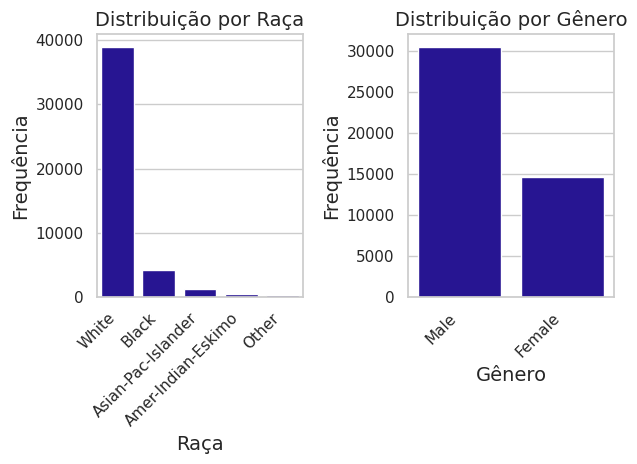

In [14]:
# Definir uma paleta de cores padrão
sns.set_palette("nipy_spectral")

# Configurar o tamanho da figura
#plt.figure(figsize=(9, 7))

assert 'race' in df.columns and 'sex' in df.columns, "Colunas sensíveis não encontradas!"

# Subplot 1: frequência de raça
plt.subplot(121)
sns.countplot(x='race', data=df, order=df['race'].value_counts().index)
plt.title("Distribuição por Raça", size=14)
plt.xlabel("Raça", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=45, ha='right', size=11)
plt.yticks(size=11)

# Subplot 2: frequência de gênero
plt.subplot(122)
sns.countplot(x='sex', data=df, order=df['sex'].value_counts().index)
plt.title("Distribuição por Gênero", size=14)
plt.xlabel("Gênero", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=45, ha='right', size=11)
plt.yticks(size=11)

# Ajustar o layout
plt.tight_layout()
plt.show()


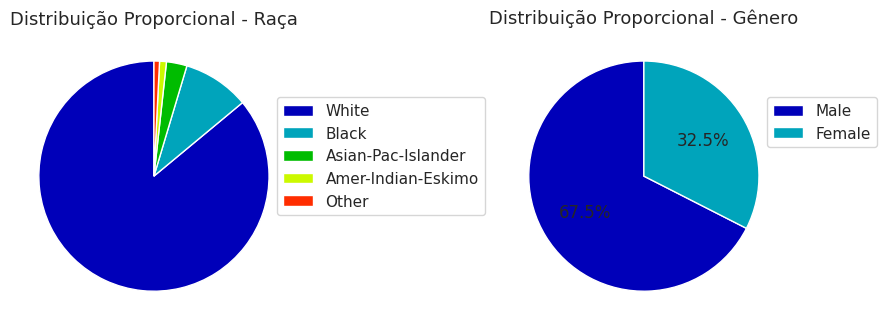

In [15]:
# Estilo do Seaborn
#sns.set()
#sns.set_palette("nipy_spectral_r")
plt.figure(figsize=(9, 7))
plt.subplot(121)

# Plot com relação à raça
counts = df['race'].value_counts()
labels = counts.index
cores = sns.color_palette("nipy_spectral", len(counts))

plt.pie(counts, colors=cores, startangle=90)
plt.legend(labels, loc=2, bbox_to_anchor=(0.9, 0.8), fontsize=11)
plt.title("Distribuição Proporcional - Raça",size=13)

plt.subplot(122)

# Plot com relação ao gênero
counts = df['sex'].value_counts()
labels = counts.index

plt.pie(counts,colors=cores, startangle=90, autopct='%1.1f%%')
plt.legend(labels, loc=2,bbox_to_anchor=(0.9, 0.8), fontsize=11)
plt.title("Distribuição Proporcional - Gênero",size=13)


plt.tight_layout()

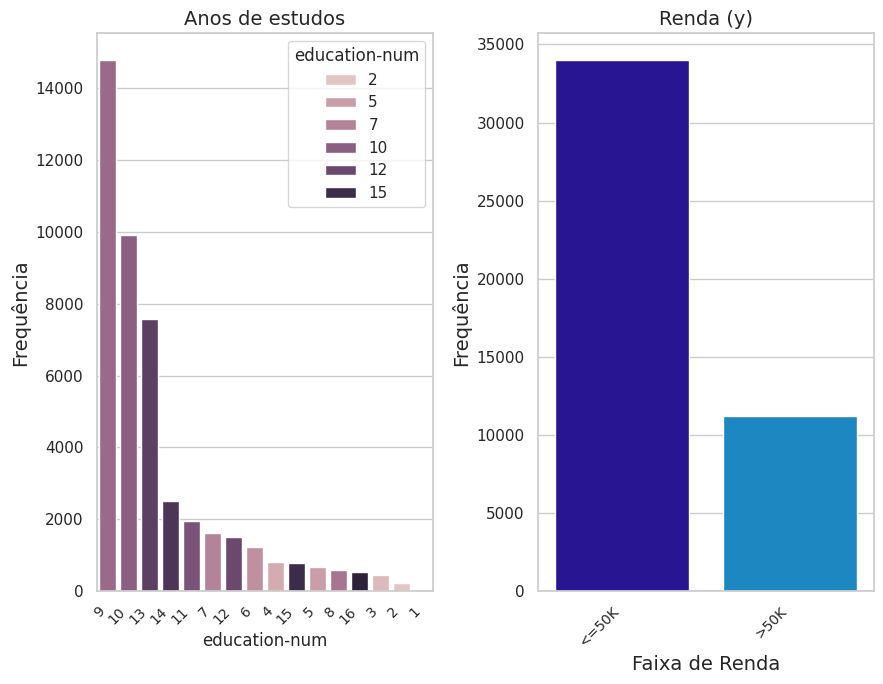

In [16]:
sns.set_style('whitegrid')

plt.figure(figsize=(9,7))

# Subplot 1: Raça
plt.subplot(121)
sns.countplot(x='education-num', data=df, hue='education-num', order=df['education-num'].value_counts().index)
plt.title("Anos de estudos", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=45, ha='right', size=10)

# Subplot 2: Gênero
plt.subplot(122)
sns.countplot(x='y', data=df, hue='y', order=df['y'].value_counts().index)
plt.title("Renda (y)", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=45, ha='right', size=10)

plt.xlabel("Faixa de Renda", size=14)

plt.tight_layout()
plt.show()


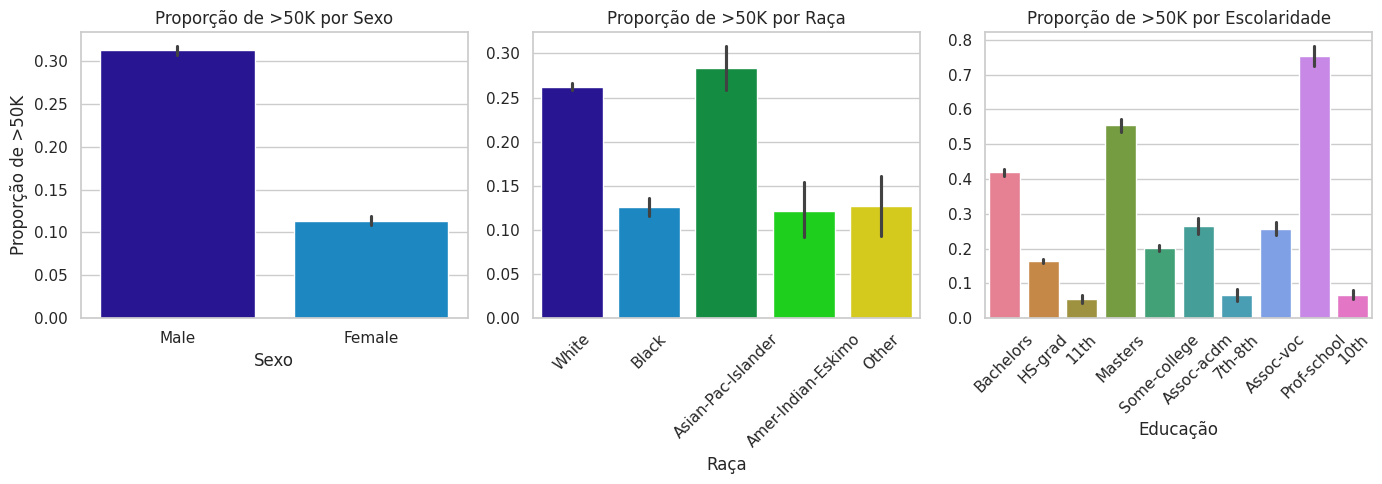

In [17]:
# Criar coluna numérica temporária para plotagem
df['y_numerica'] = (df['y'] == '>50K').astype(int)

# Gráficos
plt.figure(figsize=(14, 5))

# Sexo
plt.subplot(131)
sns.barplot(x='sex', y='y_numerica', data=df, hue='sex')
plt.title('Proporção de >50K por Sexo')
plt.ylabel('Proporção de >50K')
plt.xlabel('Sexo')

# Raça
plt.subplot(132)
sns.barplot(x='race', y='y_numerica', data=df, hue='race')
plt.title('Proporção de >50K por Raça')
plt.ylabel('')
plt.xlabel('Raça')
plt.xticks(rotation=45)

# Escolaridade
plt.subplot(133)
top_educ = df['education'].value_counts().head(10).index
educ_df = df[df['education'].isin(top_educ)]
sns.barplot(x='education', y='y_numerica', data=educ_df, hue='education')
plt.title('Proporção de >50K por Escolaridade')
plt.ylabel('')
plt.xlabel('Educação')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


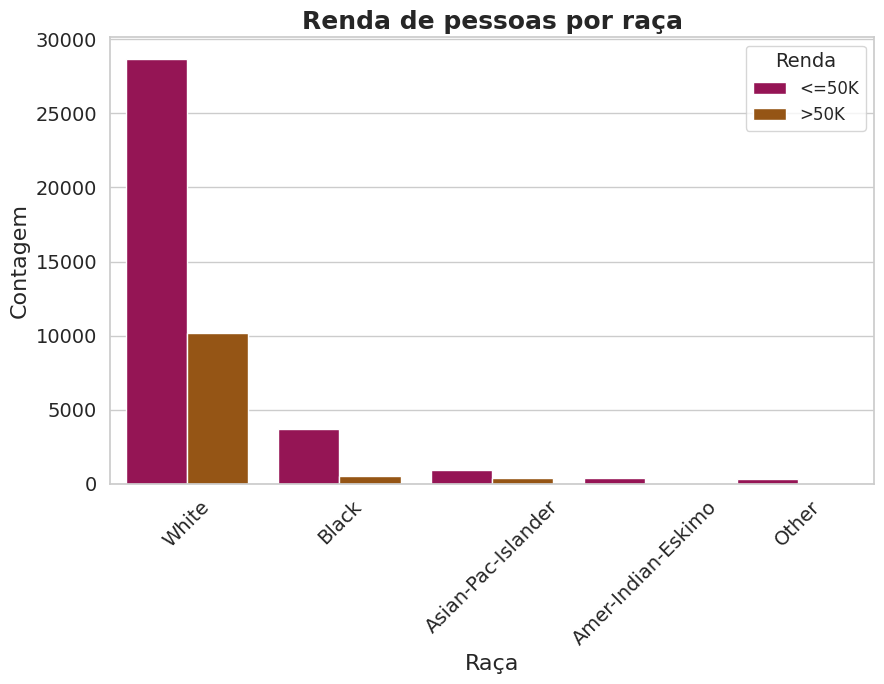

In [18]:
# Configurar o tamanho da figura
plt.figure(figsize=(9, 7))

# Plotar o gráfico de barras com Seaborn
sns.countplot(data=df, x='race', hue='y', palette='brg')

# Adicionar título e configurar a aparência dos textos
plt.title('Renda de pessoas por raça', fontsize=18, fontweight='bold')
plt.xlabel('Raça', fontsize=16)  # Adicionar rótulo ao eixo x
plt.ylabel('Contagem', fontsize=16)  # Adicionar rótulo ao eixo y
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)  # Ajustar tamanho da fonte das marcações do eixo y

# Ajustar a legenda
plt.legend(title='Renda', title_fontsize='14', fontsize='12', loc='upper right')

# Ajustar layout para melhor visualização
plt.tight_layout()

# Mostrar o gráfico
plt.show()


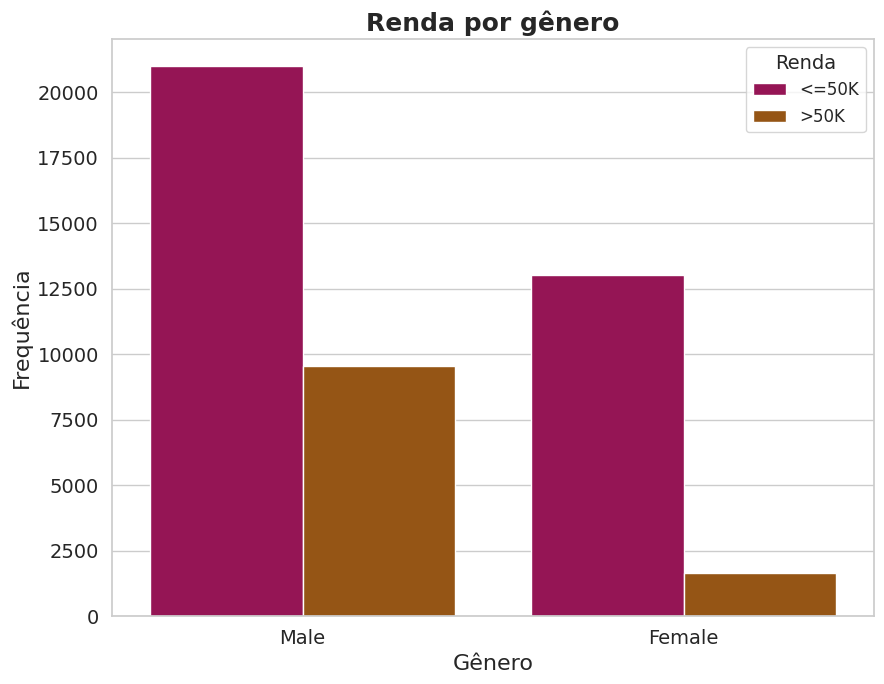

In [19]:
# Configurar o tamanho da figura
plt.figure(figsize=(9, 7))

# Plotar o gráfico de barras com Seaborn
sns.countplot(data=df, x='sex', hue='y', palette='brg')

# Adicionar título e configurar a aparência dos textos
plt.title('Renda por gênero', fontsize=18, fontweight='bold')
plt.xlabel('Gênero', fontsize=16)  # Adicionar rótulo ao eixo x
plt.ylabel('Frequência', fontsize=16)  # Adicionar rótulo ao eixo y
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ajustar a legenda
plt.legend(title='Renda', title_fontsize='14', fontsize='12', loc='upper right')

# Ajustar layout para melhor visualização
plt.tight_layout()

# Mostrar o gráfico
plt.show()


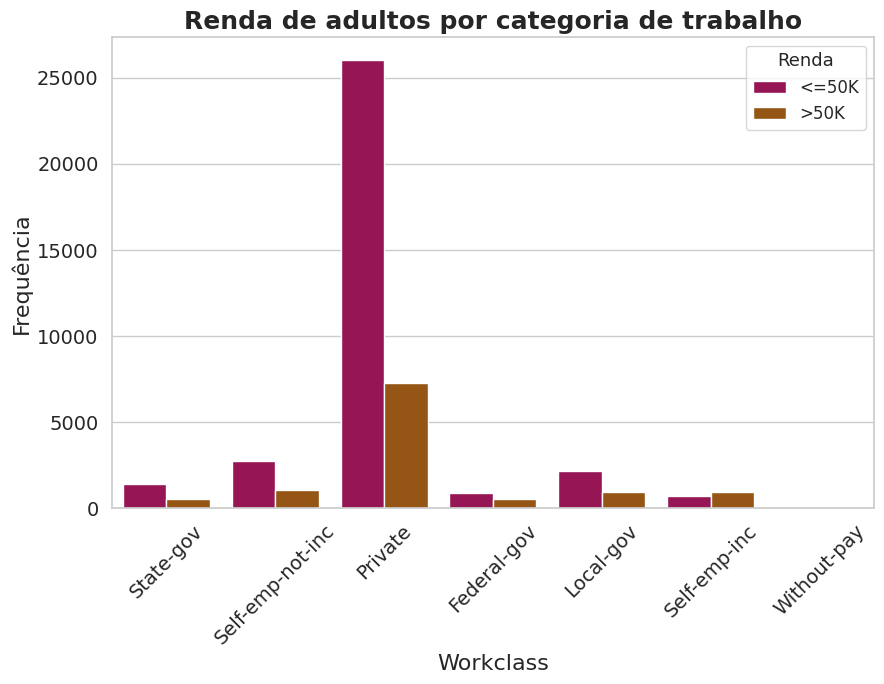

In [20]:
# Configurar o tamanho da figura
plt.figure(figsize=(9, 7))

# Plotar o gráfico de barras com Seaborn
sns.countplot(data=df, x='workclass', hue='y', palette='brg')

# Adicionar título e configurar a aparência dos textos
plt.title('Renda de adultos por categoria de trabalho', fontsize=18, fontweight='bold')
plt.xlabel('Workclass', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Ajustar a legenda
plt.legend(title='Renda', title_fontsize='13', fontsize='12', loc='upper right')

# Ajustar layout para melhor visualização
plt.tight_layout()

# Mostrar o gráfico
plt.show()


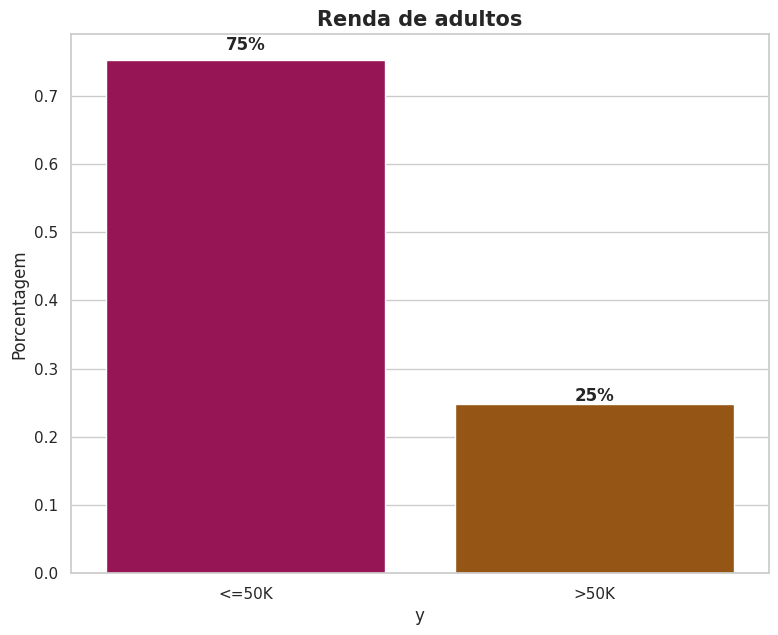

In [21]:
plt.figure(figsize = (9, 7))

plt.title('Renda de adultos', fontsize=15, fontweight='bold')
perc = df['y'].value_counts(normalize = True).rename_axis('y').reset_index(name = 'Porcentagem')

ax = sns.barplot(x = 'y', y = 'Porcentagem', data = perc.head(), hue='y', palette='brg')

if ax.legend_:
    ax.legend_.remove()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

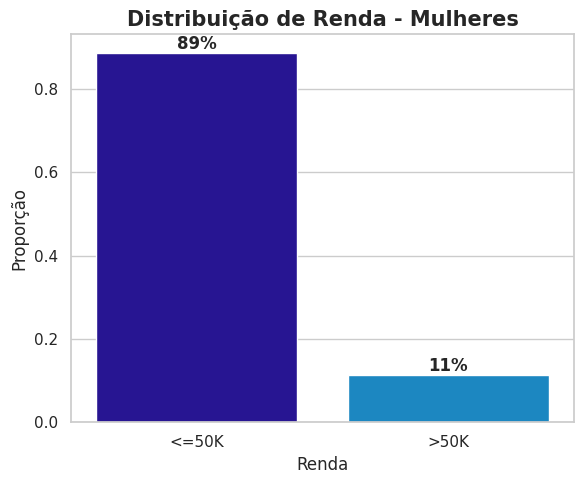

In [22]:
# Filtrar apenas mulheres
mulheres = df[df['sex'] == 'Female']

# Calcular proporção da variável alvo
perc_mulheres = mulheres['y'].value_counts(normalize=True).rename_axis('y').reset_index(name='Porcentagem')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
plt.title('Distribuição de Renda - Mulheres', fontsize=15, fontweight='bold')
ax = sns.barplot(x='y', y='Porcentagem', data=perc_mulheres, hue='y')

# Adicionar porcentagens nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2., height + 0.01),
                ha='center', fontsize=12, fontweight='bold')

plt.ylabel('Proporção')
plt.xlabel('Renda')
plt.tight_layout()
plt.show()


# Homens: df[df['sex'] == 'Male']
# Raça específica: df[df['race'] == 'Black']
# Condição interseccional: df[(df['sex'] == 'Female') & (df['race'] == 'Black')]

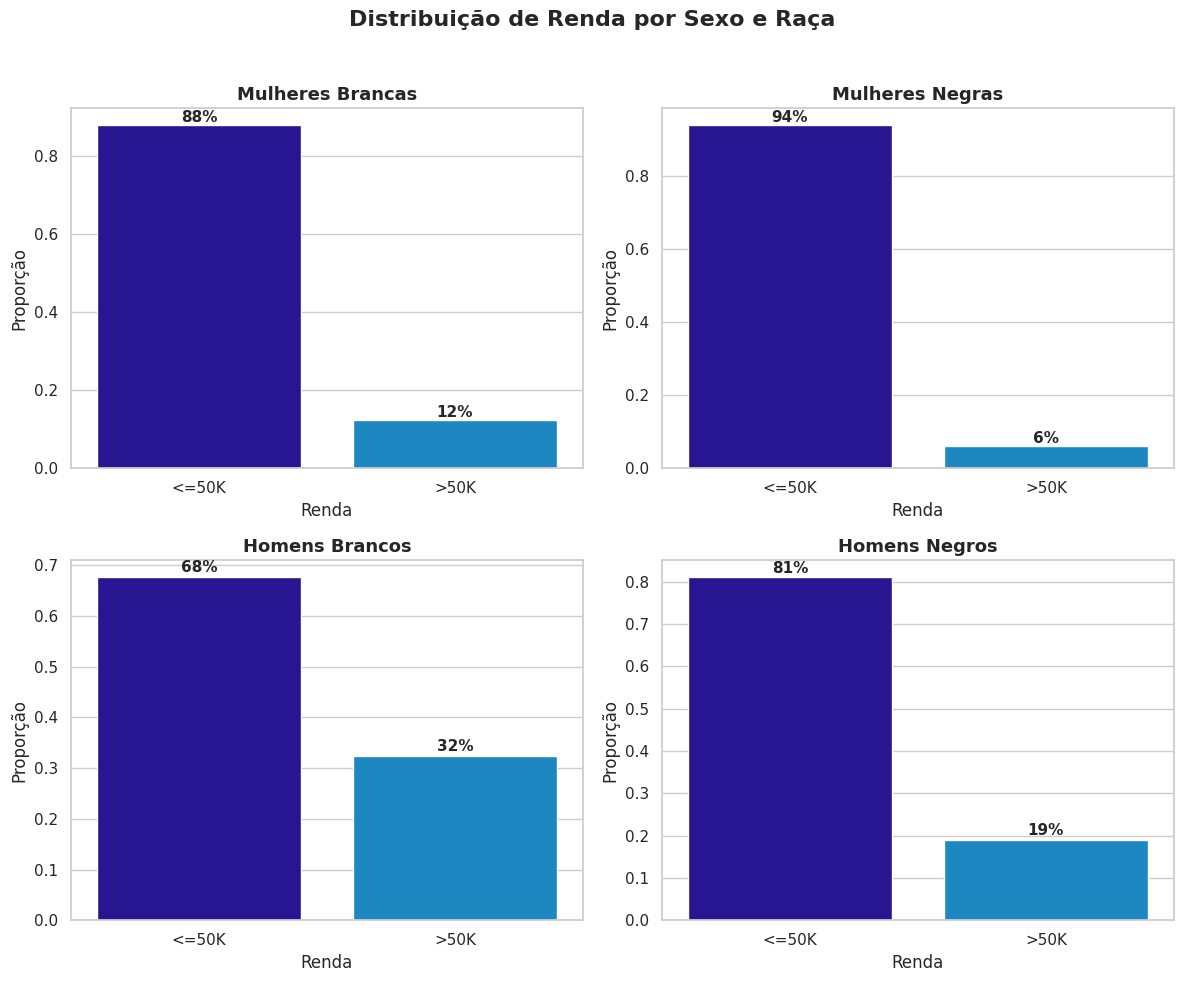

In [23]:
# Criar subgrupos interseccionais de sexo e raça
subgrupos = [
    ('Mulheres Brancas', (df['sex'] == 'Female') & (df['race'] == 'White')),
    ('Mulheres Negras', (df['sex'] == 'Female') & (df['race'] == 'Black')),
    ('Homens Brancos', (df['sex'] == 'Male') & (df['race'] == 'White')),
    ('Homens Negros', (df['sex'] == 'Male') & (df['race'] == 'Black'))
]

# Plotar gráfico para cada subgrupo
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (titulo, filtro) in enumerate(subgrupos):
    grupo_df = df[filtro]
    perc = grupo_df['y'].value_counts(normalize=True).rename_axis('y').reset_index(name='Porcentagem')

    ax = sns.barplot(x='y', y='Porcentagem', data=perc, ax=axes[i], hue='y')
    ax.set_title(f'{titulo}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Renda')
    ax.set_ylabel('Proporção')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2., height + 0.01),
                    ha='center', fontsize=11, fontweight='bold')

plt.suptitle('Distribuição de Renda por Sexo e Raça', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [24]:
def idade_cat(df):
    # Definindo os intervalos de idade e os respectivos rótulos
    bins = [18, 30, 40, 50, 60, 70, float('inf')]
    labels = ["19-30", "31-40", "41-50", "51-60", "61-70", "Maior que 70"]

    # Utilizando pd.cut para categorizar as idades
    df['idade_grupo'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
    return df

# Aplicando a função ao DataFrame
df = idade_cat(df)


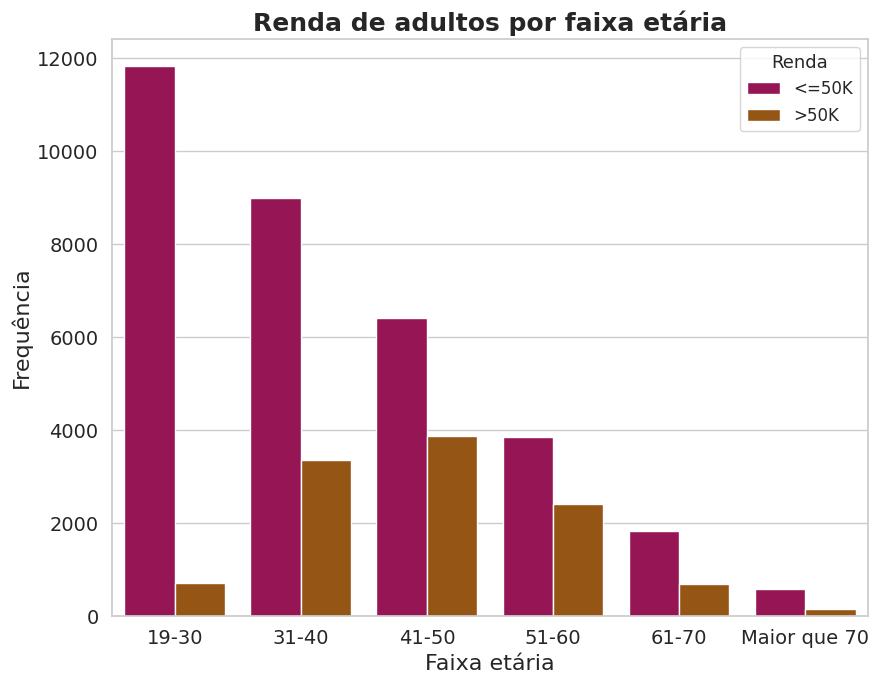

In [25]:
# Configurar o tamanho da figura
plt.figure(figsize=(9, 7))

# Ordem das categorias de idade
categorias = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Maior que 70']

# Plotar o gráfico de barras com Seaborn
sns.countplot(data=df, x='idade_grupo', hue='y', palette='brg', order=categorias)

# Adicionar título e configurar a aparência dos textos
plt.title('Renda de adultos por faixa etária', fontsize=18, fontweight='bold')
plt.xlabel('Faixa etária', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ajustar a legenda
plt.legend(title='Renda', title_fontsize='13', fontsize='12', loc='upper right')

# Ajustar layout para melhor visualização
plt.tight_layout()

# Mostrar o gráfico
plt.show()


## Definindo atributos protegidos

Certos atributos individuais estão ligados ao viés social (muitas vezes chamados de "atributos protegidos"): raça, religião, nacionalidade, gênero, estado civil, idade e status socioeconômico.

In [63]:
df_fair = df[['race','sex', 'age', 'marital-status']].copy()

# Definir variáveis protegidas
df_fair['priv_race'] = df_fair['race'].apply(lambda x: 1 if x == 'White' else 0)            # 1 se for branco, 0 se for qualquer outra raça
df_fair['priv_sex'] = df_fair['sex'].apply(lambda x: 1 if x == 'Male' else 0)               # 1 se for homem, 0 se for mulher
df_fair['priv_age'] = df['age'].apply(lambda x: 1 if x >= 40 else 0)                        # 1 se idade acima de 40, 0 se mais jovem
df_fair['priv_marital'] = df['marital-status'].apply(lambda x: 1 if 'Married' in x else 0)  # 1 se casado, 0 caso contrário

# Definir variável objetivo (target)
df_fair['y'] = df['y'].apply(lambda x: 1 if x == '>50K' else 0)

df_fair.head().T


,0,1,2,3,4
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female
age,39,50,38,53,28
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
priv_race,1,1,1,0,0
priv_sex,1,1,1,1,0
priv_age,0,1,0,1,0
priv_marital,0,1,0,1,1
y,0,0,0,0,0


In [65]:
df_fair.head()

,race,sex,age,marital-status,priv_race,priv_sex,priv_age,priv_marital,y
0,White,Male,39,Never-married,1,1,0,0,0
1,White,Male,50,Married-civ-spouse,1,1,1,1,0
2,White,Male,38,Divorced,1,1,0,0,0
3,Black,Male,53,Married-civ-spouse,0,1,1,1,0
4,Black,Female,28,Married-civ-spouse,0,0,0,1,0


## Prevalência

In [28]:
# Medição da prevalência
prev = df_fair['y'].mean()
prev_race = df_fair.groupby('priv_race')['y'].mean()
prev_sex = df_fair.groupby('priv_sex')['y'].mean()
prev_comb = df_fair.groupby(['priv_race', 'priv_sex'])['y'].mean()

print(f"Prevalência geral: {prev:.9f}")

print("\nPrevalência por raça:")
for group, value in prev_race.items():
    race_label = 'White' if group == 1 else 'Non-White'
    print(f"  {race_label}: {value:.9f}")

print("\nPrevalência por gênero:")
for group, value in prev_sex.items():
    sex_label = 'Male' if group == 1 else 'Female'
    print(f"  {sex_label}: {value:.9f}")

print("\nPrevalência combinada por raça e gênero:")
for (race, sex), value in prev_comb.items():
    race_label = 'White' if race == 1 else 'Non-White'
    sex_label = 'Male' if sex == 1 else 'Female'
    print(f"  {race_label} & {sex_label}: {value:.9f}")


Prevalência geral: 0.247843970

Prevalência por raça:
  Non-White: 0.158411141
  White: 0.262370511

Prevalência por gênero:
  Female: 0.113576046
  Male: 0.312477479

Prevalência combinada por raça e gênero:
  Non-White & Female: 0.076102418
  Non-White & Male: 0.224408326
  White & Female: 0.122443827
  White & Male: 0.323908216


## **1. Prevalência Geral**

```text
Prevalência geral: 0.247843970
```

* **Cerca de 24,78%** das pessoas no conjunto de dados têm renda `>50K`.
* Isso confirma que a **classe positiva (alta renda) é minoria**, o que já exige cuidado na modelagem.

---

## **2. Prevalência por Raça**

```text
Non-White: 0.158411141
White:     0.262370511
```

* **Brancos têm mais chance (26,2%) de ganhar >50K** do que não-brancos (15,8%).
* A diferença é de mais de 10 pontos percentuais.
* Isso sugere viés estrutural nos dados — base para análise de *Impacto Díspar*.

---

## **3. Prevalência por Gênero**

```text
Female: 0.113576046
Male:   0.312477479
```

* A diferença aqui é ainda maior:

  * **Homens**: \~31%
  * **Mulheres**: \~11%
* Ou seja, **homens têm quase 3x mais chance de ter renda alta**.

Isso é um forte indício de **viés de gênero** nos dados, que pode ser absorvido por modelos preditivos.

---

## **4. Prevalência Combinada (Interseccional)**

```text
Non-White & Female: 0.0761   ← mais afetado
Non-White & Male:   0.2244
White & Female:     0.1224
White & Male:       0.3239   ← mais privilegiado
```

| Grupo                  | Observações                          |
| ---------------------- | ------------------------------------ |
| **White & Male**       | Grupo com maior prevalência (>32%)   |
| **Non-White & Female** | Grupo com menor prevalência (\~7.6%) |
| Diferença absoluta     | \~25 pontos percentuais (!)          |

Esse é um retrato claro de **viés interseccional** — onde raça e gênero combinados amplificam a desigualdade.

---

## Pense nisto:

* Evidência quantitativa clara de **viés** nos dados originais.
* Essas disparidades podem impactar fortemente:

  * Métricas de *fairness* como *Impacto Díspar*,
  * Decisões de modelos preditivos.



Para uma variável objetivo/alvo (*target*), a prevalência é a proporção de casos positivos em relação ao total de casos. Onde um caso positivo é quando a variável alvo tem um valor de 1. Nosso conjunto de dados tem uma prevalência geral de 24,8%. Isso é aproximadamente 1/4 das pessoas em nosso conjunto de dados ganham acima de $ 50.000. Também podemos usar a prevalência como uma métrica de equidade/justiça.

---

Fazemos isso calculando a prevalência para nossos diferentes grupos privilegiados (1) e desprivilegiados (0). Você pode ver esses valores na Tabela abaixo. Observe que a prevalência é muito maior para os grupos privilegiados. Na verdade, se você é homem, tem quase 3 vezes mais chances de ganhar acima de $ 50.000 do que se for mulher.

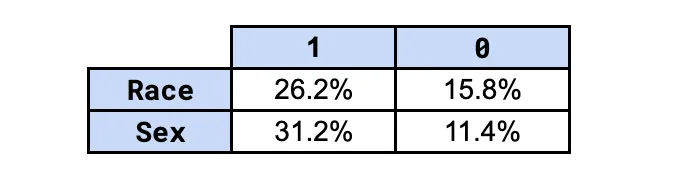

Podemos ir além calculando a prevalência na interseção dos atributos protegidos. Você pode ver esses valores na Tabela abaixo. O canto superior esquerdo mostra a prevalência se você estiver em ambos os grupos privilegiados (ou seja, sexo = 1 e raça = 1). Da mesma forma, o canto inferior direito fornece a prevalência se você não estiver em nenhum dos grupos privilegiados (ou seja, sexo = 0 e raça = 0). Isso nos diz que os homens brancos têm 4 vezes mais chances de ganhar acima de $ 50.000 do que as mulheres não brancas.

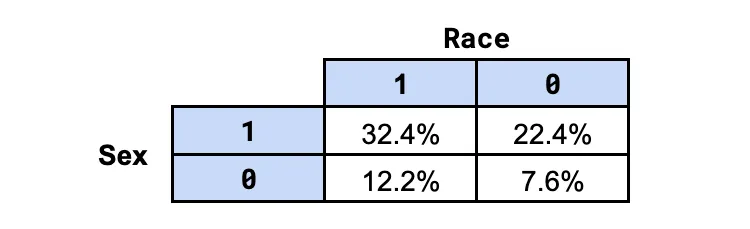

Por que temos essas grandes diferenças de prevalência? O conjunto de dados foi construído usando dados do censo dos Estados Unidos de 1994. O país tem um histórico de discriminação com base em gênero e raça. Em última análise, a variável objetivo reflete essa discriminação. Nesse sentido, a prevalência pode ser usada para entender até que ponto a injustiça histórica está embutida em nossa variável objetivo.

## Variável "proxy" (de substituição)

In [29]:
# Mapeando a variável objetivo 'y' para valores binários
#df['y'] = df['y'].map({'<=50K': 0, '>50K': 1})

#ou

# df['y'] = np.where(df['y'] == '>50K', 1, 0)

#ou:
# Variável objetivo
y = [1 if value == '>50K' else 0 for value in df['y']]

In [30]:
# Manter a coluna original 'y' com strings
# Criar uma nova coluna binária 'y_bin' para modelagem
df['y_bin'] = df['y'].map({'>50K': 1, '<=50K': 0})
assert set(df['y_bin'].unique()) == {0, 1}, "Erro: 'y_bin' não está corretamente binarizada."

# Atributos do modelo
X = df[['age', 'education-num', 'hours-per-week']].copy()

# Modificando 'marital-status' para atributo binário
X['marital-status'] = df['marital-status'].apply(lambda x: 1 if x == 'Married-civ-spouse' else 0)

# Modificando 'native-country' para atributo binário
X['native-country'] = df['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)

# Agrupando 'occupation' em cinco grupos
occ_groups = {
    'Priv-house-serv': 0, 'Other-service': 0, 'Handlers-cleaners': 0,
    'Farming-fishing': 1, 'Machine-op-inspct': 1, 'Adm-clerical': 1,
    'Transport-moving': 2, 'Craft-repair': 2, 'Sales': 2,
    'Armed-Forces': 3, 'Tech-support': 3, 'Protective-serv': 3,
    'Prof-specialty': 4, 'Exec-managerial': 4
}

X['occupation'] = df['occupation'].map(occ_groups)
missing_occupations = X['occupation'].isna().sum()
print(f"Ocupações não mapeadas: {missing_occupations}")

# Verificando os dados
X.head()


Ocupações não mapeadas: 0


,age,education-num,hours-per-week,marital-status,native-country,occupation
0,39,13,40,0,1,1
1,50,13,13,1,1,4
2,38,9,40,0,1,0
3,53,7,40,1,1,0
4,28,13,40,1,0,4


In [31]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 

### Preparando matriz de correlação

In [32]:
# Mapeando a variável objetivo 'y' para valores binários
#df['y'] = df['y'].map({'<=50K': 0, '>50K': 1})

In [33]:
# Selecionar apenas colunas numéricas do DataFrame
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular a matriz de correlação usando apenas colunas numéricas
corr_matrix = df[numeric_cols].corr()

In [34]:
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,y_numerica,y_bin
age,1.000000000,-0.075791969,0.037622952,0.079683241,0.059350578,0.101992245,0.237040235,0.237040235
fnlwgt,-0.075791969,1.000000000,-0.041993021,-0.004110483,-0.004348775,-0.018678732,-0.007263913,-0.007263913
education-num,0.037622952,-0.041993021,1.000000000,0.126906802,0.081711315,0.146206238,0.332799879,0.332799879
capital-gain,0.079683241,-0.004110483,0.126906802,1.000000000,-0.032102328,0.083880418,0.221033806,0.221033806
capital-loss,0.059350578,-0.004348775,0.081711315,-0.032102328,1.000000000,0.054194866,0.148686989,0.148686989
hours-per-week,0.101992245,-0.018678732,0.146206238,0.083880418,0.054194866,1.000000000,0.227199142,0.227199142
y_numerica,0.237040235,-0.007263913,0.332799879,0.221033806,0.148686989,0.227199142,1.000000000,1.000000000
y_bin,0.237040235,-0.007263913,0.332799879,0.221033806,0.148686989,0.227199142,1.000000000,1.000000000


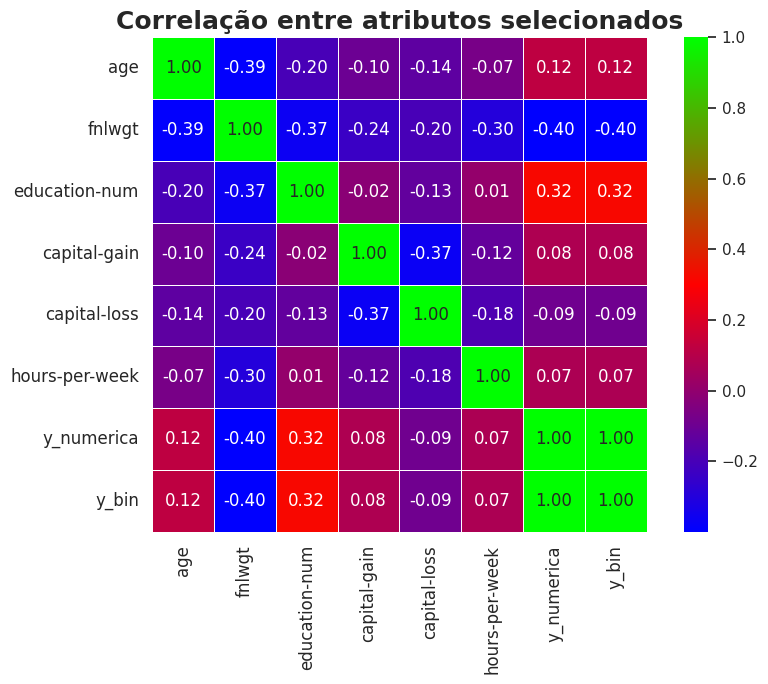

In [35]:
# Configurar o tamanho da figura
plt.figure(figsize=(9, 7))

# Adicionar título e configurar a aparência dos textos
plt.title("Correlação entre atributos selecionados", fontsize=18, fontweight='bold')

# Plotar o heatmap com Seaborn (nipy_spectral_r não ficou bom, mas nipy_spectral sim)
sns.heatmap(corr_matrix.corr(), cmap='brg', annot=True, fmt=".2f", square=True, linewidths=0.5)

# Ajustar os rótulos dos eixos
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)

# Remover a legenda desnecessária do heatmap
plt.legend([], [], frameon=False)

# Ajustar layout para melhor visualização
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [36]:
df_fair.head()

,race,sex,age,marital-status,priv_race,priv_sex,priv_age,priv_marital,y
0,White,Male,39,Never-married,1,1,0,0,0
1,White,Male,50,Married-civ-spouse,1,1,1,1,0
2,White,Male,38,Divorced,1,1,0,0,0
3,Black,Male,53,Married-civ-spouse,0,1,1,1,0
4,Black,Female,28,Married-civ-spouse,0,0,0,1,0


In [37]:
X

,age,education-num,hours-per-week,marital-status,native-country,occupation
0,39,13,40,0,1,1
1,50,13,13,1,1,4
2,38,9,40,0,1,0
3,53,7,40,1,1,0
4,28,13,40,1,0,4
...,...,...,...,...,...,...
48836,33,13,40,0,1,4
48837,39,13,36,0,1,4
48839,38,13,50,1,1,4
48840,44,13,40,0,1,1


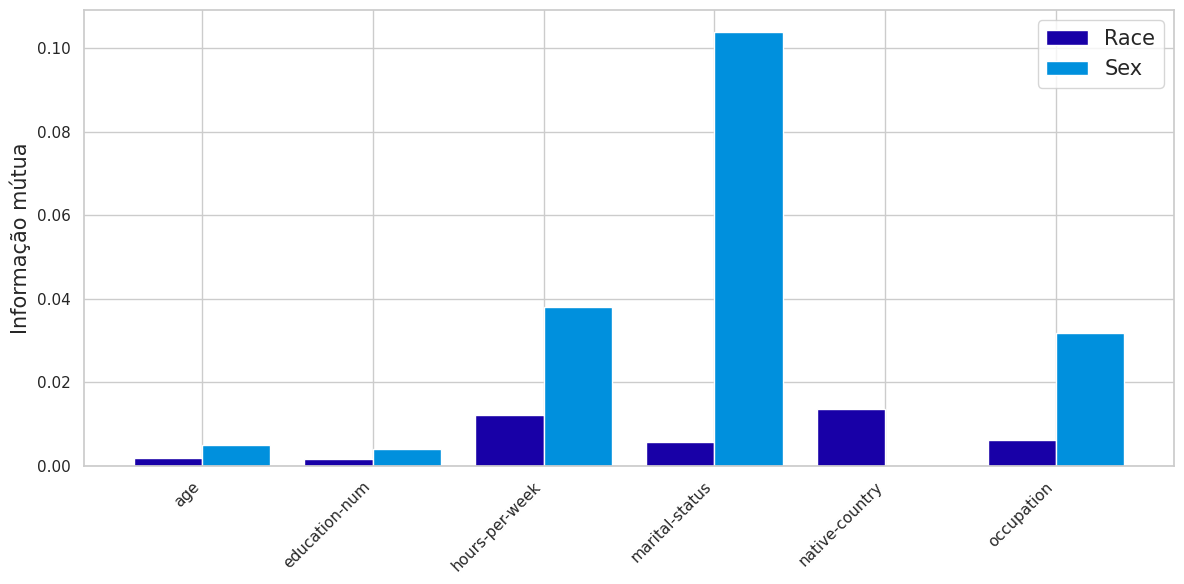

In [38]:
# Informação mútua

# Cálculo da informação mútua
mut_race = mutual_info_classif(X,df_fair['priv_race'],discrete_features=[1,3,4,5])
mut_sex = mutual_info_classif(X,df_fair['priv_sex'],discrete_features=[1,3,4,5])


# Gráfico da informação mútua
plt.figure(figsize=(12, 6))

labels = ['age', 'education-num', 'hours-per-week', 'marital-status',
       'native-country', 'occupation']
x = np.arange(len(labels))
width = 0.4
plt.bar(x-width/2,height= mut_race,width=width,label='Race')
plt.bar(x+width/2,height= mut_sex,width=width,label='Sex')
plt.legend(fontsize=15)

plt.ylabel('Informação mútua',size=15)
plt.xticks(ticks=x,labels=labels, rotation=45, ha='right')
plt.tight_layout()

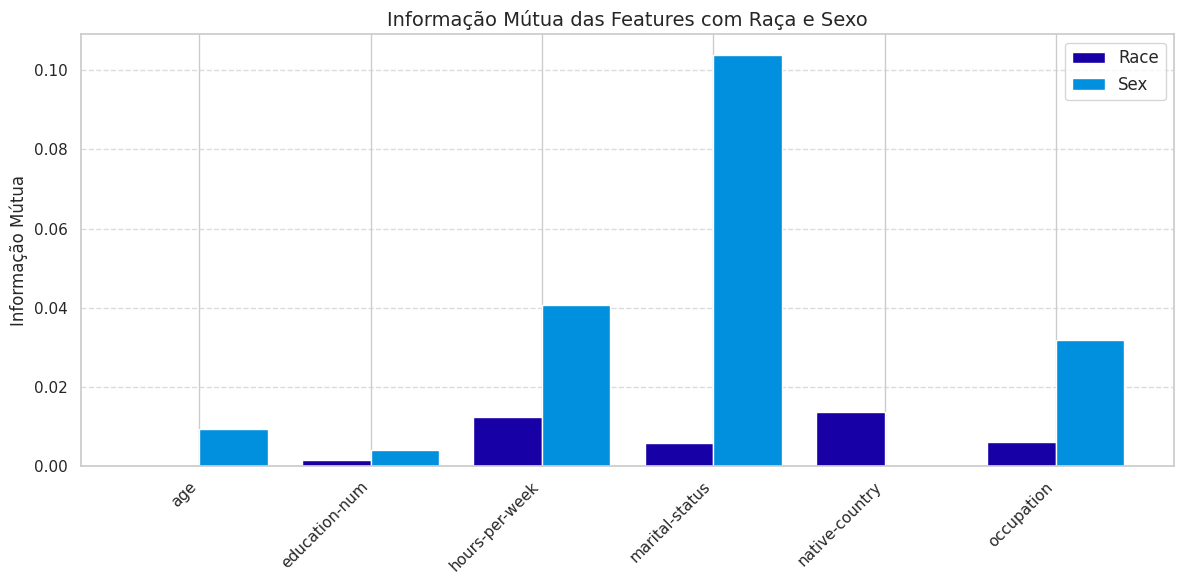

In [39]:
# Mesma coisa, um pouco mais organizado

# Cálculo da informação mútua
mut_race = mutual_info_classif(X, df_fair['priv_race'], discrete_features=[1, 3, 4, 5])
mut_sex = mutual_info_classif(X, df_fair['priv_sex'], discrete_features=[1, 3, 4, 5])

# Labels para as features
labels = ['age', 'education-num', 'hours-per-week', 'marital-status', 'native-country', 'occupation']
x = np.arange(len(labels))
width = 0.4

# Configuração da figura
plt.figure(figsize=(12, 6))

# Barras para a informação mútua
plt.bar(x - width / 2, height=mut_race, width=width, label='Race')
plt.bar(x + width / 2, height=mut_sex, width=width, label='Sex')

# Legendas, títulos e labels
plt.legend(fontsize=12)
plt.ylabel('Informação Mútua', size=12)
plt.title('Informação Mútua das Features com Raça e Sexo', size=14)
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')

# Adicionar grade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [40]:
# Cálculo da importância do atributo "race"

# Obter amostra balanceada
y_race_0 = df_fair[df_fair['priv_race'] == 0]['priv_race']
y_race_1 = df_fair[df_fair['priv_race'] == 1]['priv_race']
y_race_1 = y_race_1.sample(len(y_race_0))
#y_race = y_race_0.append(y_race_1)
y_race = pd.concat([y_race_0, y_race_1])

X_race = X.loc[y_race.index]

# Treino do modelo e predições
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X_race, y_race)
y_pred = model.predict(X_race)

# Cálculo da acurácia
acc_race = accuracy_score(y_race, y_pred)

# Obter a importância do atributo
fi_race = model.get_booster().get_score(importance_type='weight')


# Resultados na tela
print(acc_race)
print(confusion_matrix(y_race, y_pred))
print(classification_report(y_race, y_pred))

0.7305744579838582
[[4596 1723]
 [1682 4637]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      6319
           1       0.73      0.73      0.73      6319

    accuracy                           0.73     12638
   macro avg       0.73      0.73      0.73     12638
weighted avg       0.73      0.73      0.73     12638



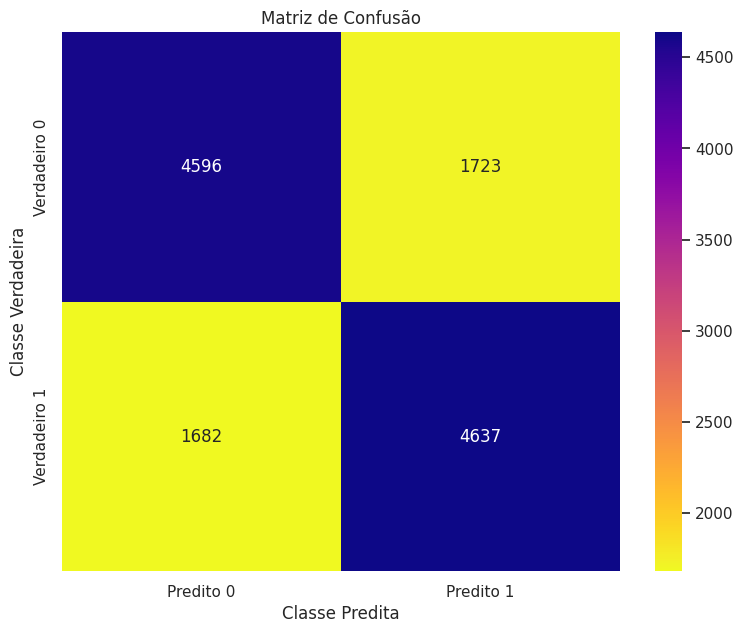

In [41]:
# Plotando a matriz de confusão com Seaborn
conf_matrix = confusion_matrix(y_race, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma_r',
            xticklabels=['Predito 0', 'Predito 1'],
            yticklabels=['Verdadeiro 0', 'Verdadeiro 1'])
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

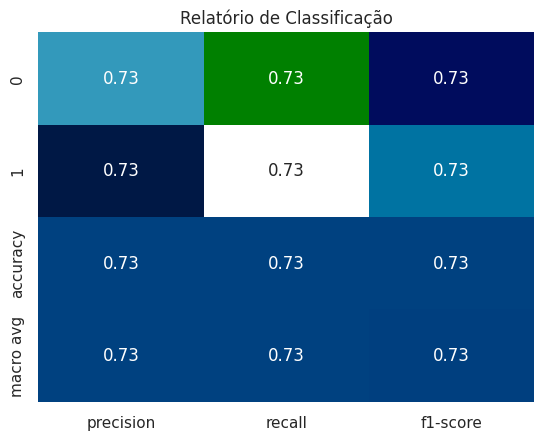

In [42]:
# Relatório de classificação
report = classification_report(y_race, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Excluir a última linha e coluna (geralmente 'accuracy' e 'support')
report_df = report_df.iloc[:-1, :-1]

# Plotar o heatmap do classification report
#plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, fmt='.2f', cmap='ocean', cbar=False)
plt.title('Relatório de Classificação')
plt.show()

In [43]:
# Cálculo da importância do atributo "sex"

# Obter amostra balanceada
y_sex_0 = df_fair[df_fair['priv_sex'] == 0]['priv_sex']
y_sex_1 = df_fair[df_fair['priv_sex'] == 1]['priv_sex']
y_sex_1 = y_sex_1.sample(len(y_sex_0))
#y_sex = y_sex_0.append(y_sex_1)
y_sex = pd.concat([y_sex_0, y_sex_1])

X_sex = X.loc[y_sex.index]

# Treino do modelo e predições
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X_sex, y_sex)

y_pred = model.predict(X_sex)

# Cálculo da acurácia
acc_sex = accuracy_score(y_sex, y_pred)

# Obter a importância do atributo
fi_sex = model.get_booster().get_score(importance_type='weight')

# Resultados na tela
print(f"Acurácia: {acc_sex}")

print("Matriz de Confusão:")
print(confusion_matrix(y_sex, y_pred))

print("Relatório de Classificação:")
print(classification_report(y_sex, y_pred))

Acurácia: 0.7916298060564818
Matriz de Confusão:
[[12346  2349]
 [ 3775 10920]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80     14695
           1       0.82      0.74      0.78     14695

    accuracy                           0.79     29390
   macro avg       0.79      0.79      0.79     29390
weighted avg       0.79      0.79      0.79     29390



Treinamos um modelo com atributos "neutros" (`X`) para **prever `priv_sex`**.
Isso serve para verificar **se esses atributos funcionam como proxies de gênero**.

---

## Métrica 1: **Acurácia**

```text
Acurácia: 0.7908
```

**O que é:** porcentagem de acertos gerais.
**Interpretação:** o modelo acerta o sexo da pessoa em \~79% dos casos **sem nem usar a variável 'sex' diretamente**.

Alta acurácia aqui **sugere que as variáveis de entrada (ex: ocupação, marital-status, etc.) codificam fortemente o gênero**.

---

## Métrica 2: **Matriz de confusão**

```text
[[12382  2313]
 [ 3836 10859]]
```

|                   | Predito = 0 | Predito = 1 |
| ----------------- | ----------- | ----------- |
| Real = 0 (mulher) | 12382 (✔️)  | 2313 (❌)    |
| Real = 1 (homem)  | 3836 (❌)    | 10859 (✔️)  |

### Termos:

* **Verdadeiro Positivo (TP)**: 10859 → homem corretamente classificado.
* **Verdadeiro Negativo (TN)**: 12382 → mulher corretamente classificada.
* **Falso Positivo (FP)**: 2313 → mulher predita como homem.
* **Falso Negativo (FN)**: 3836 → homem predito como mulher.

---

## Métrica 3: **Relatório de Classificação**

```text
              precision    recall  f1-score   support

           0       0.76      0.84      0.80     14695
           1       0.82      0.74      0.78     14695
```

Para **classe 0 (mulheres):**

* **Precision 0.76**: das predições como mulher, 76% estavam corretas.
* **Recall 0.84**: o modelo identificou corretamente 84% das mulheres reais.
* **F1-score 0.80**: harmonia entre precisão e recall.

Para **classe 1 (homens):**

* **Precision 0.82**: das predições como homem, 82% estavam corretas.
* **Recall 0.74**: o modelo acertou 74% dos homens reais.
* **F1-score 0.78**: equilíbrio médio.

### **Pense nisto:**

* O modelo é **um pouco melhor em identificar mulheres** (melhor recall),
* E **mais preciso em identificar homens** (melhor precisão).

---

## Macro e Weighted Averages:

* **Macro avg**: média simples entre classes (boa para avaliar fairness).
* **Weighted avg**: ponderada pelo número de amostras por classe.

---

Esse modelo **aprende o gênero com \~79% de acurácia usando variáveis "neutras"**, o que indica:

* Viés latente nos dados,
* Existência de **proxies de sexo** (ex: marital-status, ocupação),
* Justificativa clara para mitigação (adversarial debiasing, reponderação, fairness constraints).



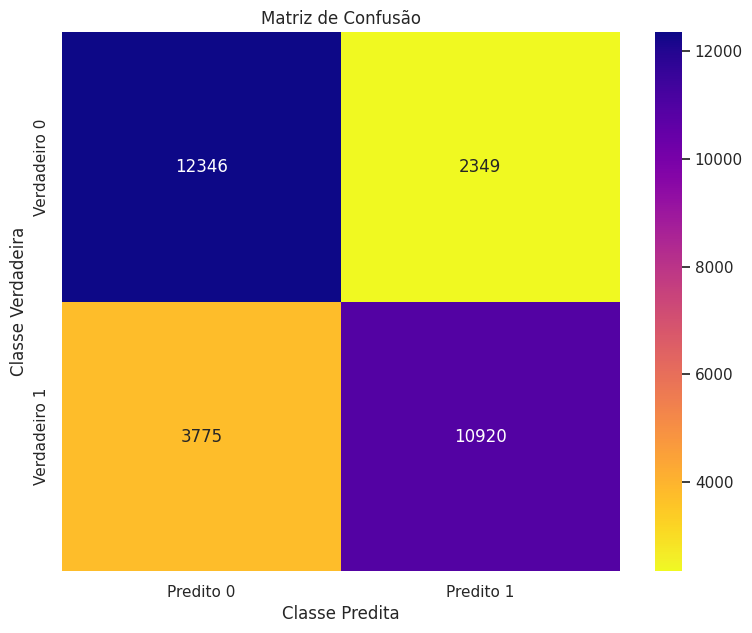

In [44]:
# Plotando a matriz de confusão com Seaborn
conf_matrix = confusion_matrix(y_sex, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma_r',
            xticklabels=['Predito 0', 'Predito 1'],
            yticklabels=['Verdadeiro 0', 'Verdadeiro 1'])
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

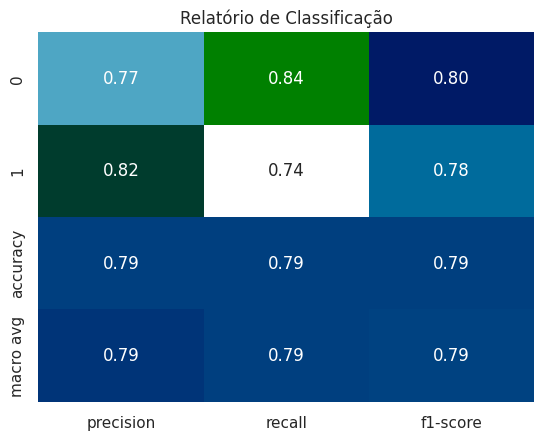

In [45]:
# Relatório de classificação
report = classification_report(y_sex, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Excluir a última linha e coluna (geralmente 'accuracy' e 'support')
report_df = report_df.iloc[:-1, :-1]

# Plotar o heatmap do classification report
#plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, fmt='.2f', cmap='ocean_r', cbar=False)
plt.title('Relatório de Classificação')
plt.show()

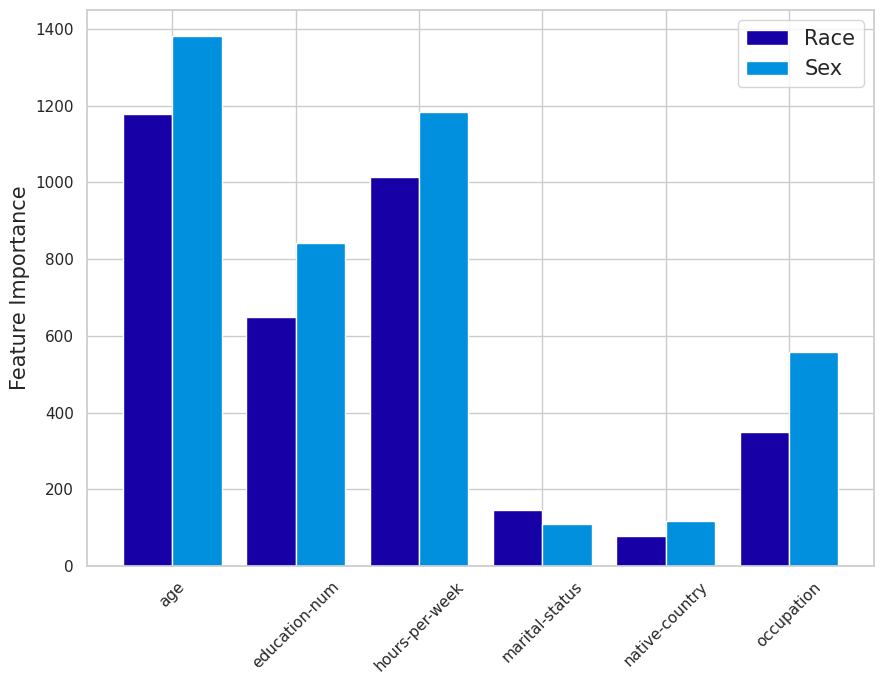

In [46]:
# Gráfico da importância do atributo
plt.figure(figsize=(9, 7))

labels = ['age', 'education-num', 'hours-per-week', 'marital-status',
       'native-country', 'occupation']

#fi_race = [fi_race[labels.index(l)] for l in labels]
#fi_sex = [fi_sex[labels.index(l)] for l in labels]

fi_race = [fi_race[l] for l in labels]
fi_sex = [fi_sex[l] for l in labels]


x = np.arange(len(labels))
width = 0.4
plt.bar(x-width/2,height= fi_race,width=width,label='Race')
plt.bar(x+width/2,height= fi_sex,width=width,label='Sex')
plt.legend(fontsize=15)

plt.ylabel('Feature Importance',size=15)
plt.xticks(ticks=x,labels=labels, rotation=45)

plt.tight_layout()

# Medindo equidade (*fairness*)

## Criando o modelo

In [47]:
# Treinando o modelo
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X, y)

# Fazendo predições
y_pred = model.predict(X)
df_fair['y_pred'] = y_pred

print(confusion_matrix(y, y_pred))
print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

[[31444  2570]
 [ 4363  6845]]
0.8466896643226748
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     34014
           1       0.73      0.61      0.66     11208

    accuracy                           0.85     45222
   macro avg       0.80      0.77      0.78     45222
weighted avg       0.84      0.85      0.84     45222



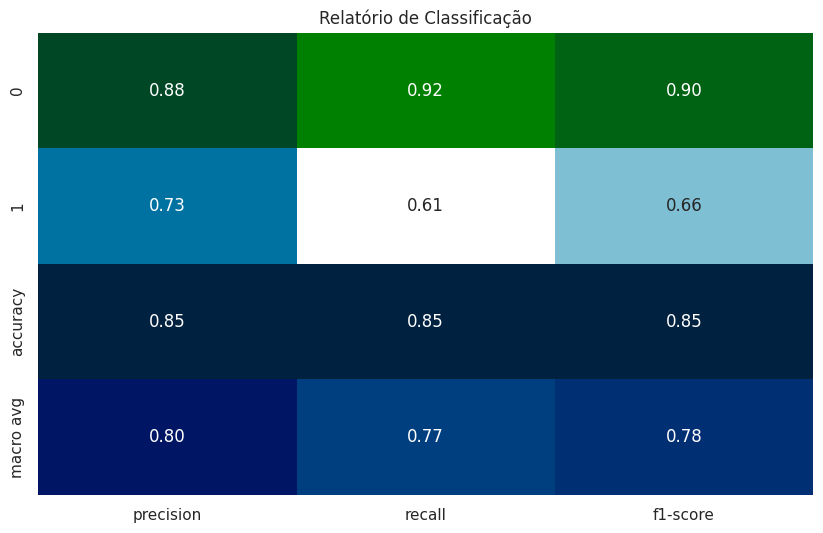

In [48]:
# Relatório de classificação
report = classification_report(y, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Excluir a última linha e coluna (geralmente 'accuracy' e 'support')
report_df = report_df.iloc[:-1, :-1]

# Plotar o heatmap do classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, fmt='.2f', cmap='ocean_r', cbar=False)
plt.title('Relatório de Classificação')
plt.show()

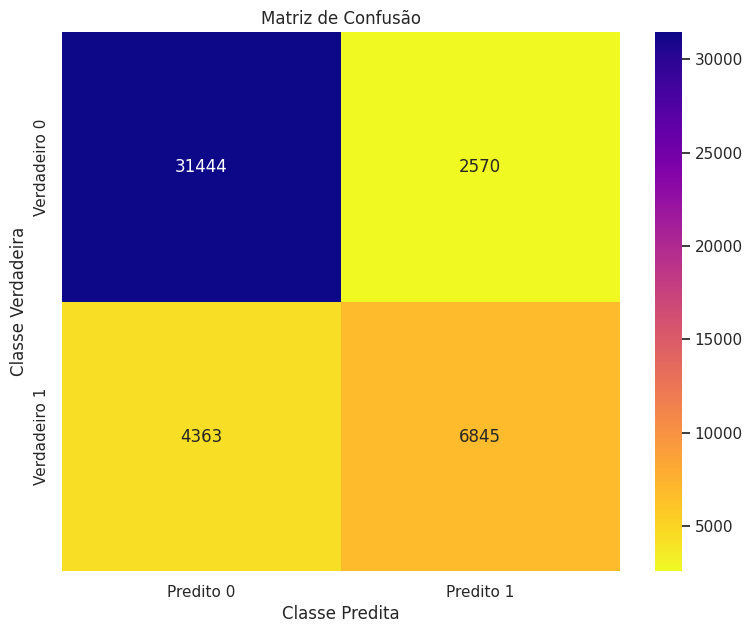

In [49]:
# Plotando a matriz de confusão com Seaborn
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma_r',
            xticklabels=['Predito 0', 'Predito 1'],
            yticklabels=['Verdadeiro 0', 'Verdadeiro 1'])
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

In [50]:
# Impacto Díspar por sexo (0 = mulher, 1 = homem)
pr_homens = df_fair[df_fair['priv_sex'] == 1]['y_pred'].mean()
pr_mulheres = df_fair[df_fair['priv_sex'] == 0]['y_pred'].mean()
di_sex = pr_mulheres / pr_homens if pr_homens > 0 else float('inf')

print(f"Impacto Díspar (Mulheres x Homens): {di_sex:.7f}")


Impacto Díspar (Mulheres x Homens): 0.2408049


In [51]:
from sklearn.metrics import recall_score

# y real = 1 (pessoas que realmente têm >50K)
mask_tp = df_fair['y'] == 1

# Equal Opportunity por sexo
tpr_homens = recall_score(
    df_fair[mask_tp & (df_fair['priv_sex'] == 1)]['y'],
    df_fair[mask_tp & (df_fair['priv_sex'] == 1)]['y_pred']
)

tpr_mulheres = recall_score(
    df_fair[mask_tp & (df_fair['priv_sex'] == 0)]['y'],
    df_fair[mask_tp & (df_fair['priv_sex'] == 0)]['y_pred']
)

print(f"TPR (Homens):   {tpr_homens:.3f}")
print(f"TPR (Mulheres): {tpr_mulheres:.3f}")


TPR (Homens):   0.640
TPR (Mulheres): 0.445


O modelo prevê positivamente (>50K) para homens quase 4x mais que para mulheres.

Mulheres com renda >50K têm muito menos chance de serem corretamente identificadas — sinal de injustiça na oportunidade.

In [52]:
# Impacto Díspar por raça (0 = não branco, 1 = branco)
pr_brancos = df_fair[df_fair['priv_race'] == 1]['y_pred'].mean()
pr_nbrancos = df_fair[df_fair['priv_race'] == 0]['y_pred'].mean()
di_race = pr_nbrancos / pr_brancos if pr_brancos > 0 else float('inf')

print(f"Impacto Díspar (Não-brancos x Brancos): {di_race:.7f}")


Impacto Díspar (Não-brancos x Brancos): 0.5305624


In [53]:
# Equal Opportunity por raça
tpr_brancos = recall_score(
    df_fair[mask_tp & (df_fair['priv_race'] == 1)]['y'],
    df_fair[mask_tp & (df_fair['priv_race'] == 1)]['y_pred']
)

tpr_nbrancos = recall_score(
    df_fair[mask_tp & (df_fair['priv_race'] == 0)]['y'],
    df_fair[mask_tp & (df_fair['priv_race'] == 0)]['y_pred']
)

print(f"TPR (Brancos):     {tpr_brancos:.3f}")
print(f"TPR (Não-brancos): {tpr_nbrancos:.3f}")


TPR (Brancos):     0.618
TPR (Não-brancos): 0.537


Menor viés que o de gênero, mas ainda significativo.

Pessoas não brancas com renda >50K são menos reconhecidas pelo modelo.

# Métricas de equidade

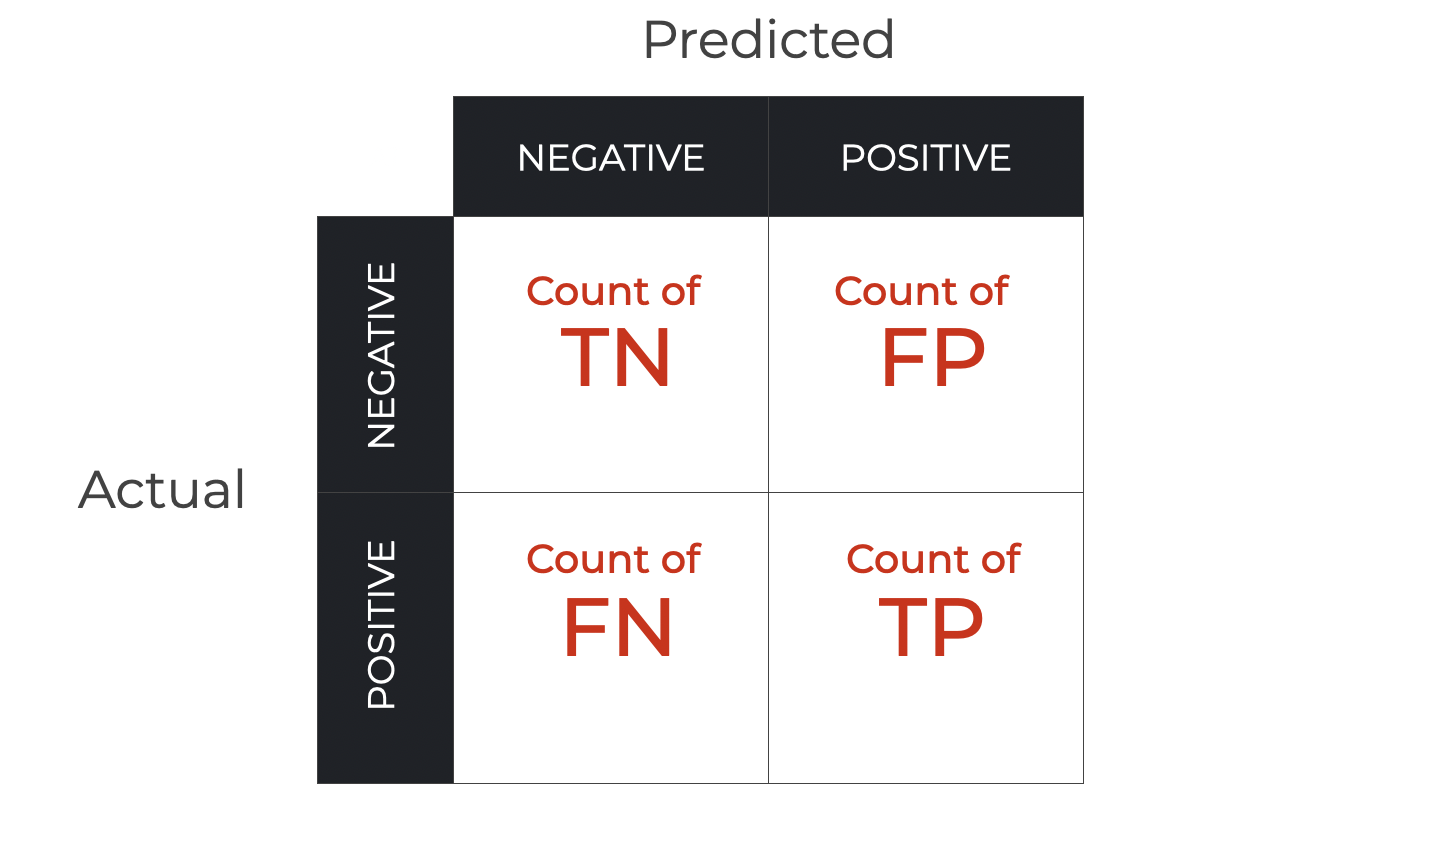

In [54]:
from sklearn.metrics import confusion_matrix
import numpy as np

def fairness_metrics(df):
    """
    Calcula métricas de fairness com base nas colunas:
    - df['y'] (rótulo verdadeiro)
    - df['y_pred'] (rótulo previsto)

    Retorna: ACC, TPR, FPR, FNR, PPP
    """
    cm = confusion_matrix(df['y'], df['y_pred'])

    if cm.shape != (2, 2):
        raise ValueError("Confusion matrix esperada com 2x2 (problema binário).")

    TN, FP, FN, TP = cm.ravel()
    N = TN + FP + FN + TP

    ACC = (TP + TN) / N if N > 0 else 0.0
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0.0
    FNR = FN / (TP + FN) if (TP + FN) > 0 else 0.0
    PPP = (TP + FP) / N if N > 0 else 0.0

    return np.array([ACC, TPR, FPR, FNR, PPP])


In [55]:
fairness_metrics(df_fair[df_fair['priv_sex'] == 0])  # mulheres



array([0.92085743, 0.44457759, 0.01811761, 0.55542241, 0.06655325])

In [56]:
fairness_metrics(df_fair[df_fair['priv_sex'] == 1])  # homens

array([0.810987  , 0.63979453, 0.1112064 , 0.36020547, 0.27637829])

In [57]:
# Diferença de TPR
metrics_female = fairness_metrics(df_fair[df_fair['priv_sex'] == 0])
metrics_male   = fairness_metrics(df_fair[df_fair['priv_sex'] == 1])

tpr_gap = abs(metrics_female[1] - metrics_male[1])
print(f'Diferença de TPR (Equal Opportunity Gap): {tpr_gap:.3f}')


Diferença de TPR (Equal Opportunity Gap): 0.195


In [58]:
# Calcular métricas de equidade para raça
fm_race_1 = fairness_metrics(df_fair[df_fair.priv_race==1])
fm_race_0 = fairness_metrics(df_fair[df_fair.priv_race==0])

# Obter proporção de métricas de imparcialidade
fm_race = fm_race_0/fm_race_1

print(fm_race_1)
print(fm_race_0)
print(fm_race)

[0.83906125 0.61790928 0.08227628 0.38209072 0.22281058]
[0.89365406 0.53746254 0.03930049 0.46253746 0.11821491]
[1.06506415 0.86980817 0.4776649  1.21054356 0.53056236]


In [59]:
# Calcular métricas de equidade para gênero
fm_sex_1 = fairness_metrics(df_fair[df_fair.priv_sex==1])
fm_sex_0 = fairness_metrics(df_fair[df_fair.priv_sex==0])


# Obter proporção de métricas de imparcialidade
fm_sex = fm_sex_0/fm_sex_1

print(fm_sex_1)
print(fm_sex_0)
print(fm_sex)

[0.810987   0.63979453 0.1112064  0.36020547 0.27637829]
[0.92085743 0.44457759 0.01811761 0.55542241 0.06655325]
[1.13547744 0.69487558 0.16291877 1.54195994 0.24080491]


In [60]:
def group_fairness_report(df, group_col, verbose=True):
    """
    Calcula métricas de fairness por subgrupo (0 vs 1) para uma variável protegida.

    Parâmetros:
        df: DataFrame contendo colunas 'y', 'y_pred' e group_col (ex: 'priv_sex')
        group_col: nome da coluna do grupo protegido
        verbose: se True, imprime os resultados

    Retorna:
        dicionário com métricas por grupo e suas diferenças
    """
    metrics_names = ['ACC', 'TPR', 'FPR', 'FNR', 'PPP']
    result = {}

    for group_val in [0, 1]:
        sub_df = df[df[group_col] == group_val]
        if sub_df.empty:
            raise ValueError(f"Grupo {group_val} vazio em {group_col}")
        result[group_val] = fairness_metrics(sub_df)

    # Cálculo das diferenças absolutas
    diffs = np.abs(result[1] - result[0])
    result['gap'] = dict(zip(metrics_names, diffs))

    if verbose:
        print(f"== Métricas para {group_col} ==")
        for name, val0, val1, diff in zip(metrics_names, result[0], result[1], diffs):
            print(f"{name}: Grupo 0 = {val0:.3f} | Grupo 1 = {val1:.3f} | Diferença = {diff:.3f}")

    return result


In [61]:
# Para sexo (0 = mulher, 1 = homem)
group_fairness_report(df_fair, 'priv_sex')

# Para raça (0 = não branco, 1 = branco)
group_fairness_report(df_fair, 'priv_race')


== Métricas para priv_sex ==
ACC: Grupo 0 = 0.921 | Grupo 1 = 0.811 | Diferença = 0.110
TPR: Grupo 0 = 0.445 | Grupo 1 = 0.640 | Diferença = 0.195
FPR: Grupo 0 = 0.018 | Grupo 1 = 0.111 | Diferença = 0.093
FNR: Grupo 0 = 0.555 | Grupo 1 = 0.360 | Diferença = 0.195
PPP: Grupo 0 = 0.067 | Grupo 1 = 0.276 | Diferença = 0.210
== Métricas para priv_race ==
ACC: Grupo 0 = 0.894 | Grupo 1 = 0.839 | Diferença = 0.055
TPR: Grupo 0 = 0.537 | Grupo 1 = 0.618 | Diferença = 0.080
FPR: Grupo 0 = 0.039 | Grupo 1 = 0.082 | Diferença = 0.043
FNR: Grupo 0 = 0.463 | Grupo 1 = 0.382 | Diferença = 0.080
PPP: Grupo 0 = 0.118 | Grupo 1 = 0.223 | Diferença = 0.105


{0: array([0.89365406, 0.53746254, 0.03930049, 0.46253746, 0.11821491]),
 1: array([0.83906125, 0.61790928, 0.08227628, 0.38209072, 0.22281058]),
 'gap': {'ACC': np.float64(0.054592804270506834),
  'TPR': np.float64(0.08044674048396983),
  'FPR': np.float64(0.042975786533481976),
  'FNR': np.float64(0.08044674048396983),
  'PPP': np.float64(0.10459567273885259)}}

# Análise adicional

In [62]:
# Garantir que a variável binária alvo está no df_fair
df_fair['y'] = df['y_bin']

# Garantir que marital-status binário está presente
df_fair['marital-status'] = X['marital-status']

# Contagem por grupo (sexo x estado civil)
count_ms = df_fair.groupby(['priv_sex','marital-status'])['priv_sex'].count()

# Prevalência de >50K por estado civil
prev_ms = df_fair.groupby(['marital-status'])['y'].mean()

# Prevalência de >50K por sexo
prev_sex = df_fair.groupby(['priv_sex'])['y'].mean()

print(count_ms)
print(prev_ms)
print(prev_sex)


priv_sex  marital-status
0         0                 12482
          1                  2213
1         0                 11685
          1                 18842
Name: priv_sex, dtype: int64
marital-status
0    0.068026648
1    0.454238898
Name: y, dtype: float64
priv_sex
0    0.113576046
1    0.312477479
Name: y, dtype: float64


## **1. Contagem por sexo e estado civil**

```text
priv_sex  marital-status
0 (mulher)  0 (não casada)      12.482
            1 (casada)           2.213
1 (homem)   0 (não casado)      11.685
            1 (casado)         18.842
```

* A **maioria das mulheres estão não casadas**.
* A **maioria dos homens estão casados**.
* Temos que `marital-status` está **fortemente correlacionado com gênero**.
* Logo, pode atuar como um **proxy para `sex`** em modelos.

---

## **2. Prevalência de renda >50K por estado civil**

```text
marital-status
0 (não casado): 0.068 → 6.8%
1 (casado):     0.454 → 45.4%
```

* Pessoas casadas têm **6 vezes mais chance de estar na classe >50K** do que as não casadas.
* Isso indica que `marital-status` é **altamente preditivo da renda**.
* Também alerta para possível viés estrutural, já que:

  * Homens são mais frequentemente casados,
  * Casados são mais frequentemente >50K,
  * → o modelo pode beneficiar homens indiretamente via status civil.

---

## **3. Prevalência de renda >50K por sexo**

```text
priv_sex
0 (mulher): 0.114 → 11.4%
1 (homem):  0.312 → 31.2%
```

* Homens têm quase **3x mais chance** de estar na classe >50K.
* Isso reforça a **necessidade de mitigação de viés**.

---

## **Pense nisto:**

* `marital-status` carrega **forte correlação com gênero** e **grande impacto na predição de renda**.
* Um modelo que use `marital-status` sem mitigação pode **reforçar viés de gênero**.
* Isso justifica análise de *fairness* ou exclusão de atributos sensíveis/*proxies*.


Referência: https://medium.com/data-science/analysing-fairness-in-machine-learning-with-python-96a9ab0d0705